In [67]:
import pandas as pd
data = pd.read_csv('integerArray.txt', header = None)

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Brute force method

In [40]:
def bruteForceCount(arr):
    count = 0
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            if arr[i] > arr [j]:
                count = count + 1
                #print(count)
    return count 

In [41]:
arr = [1, 2, 5, 6, 4, 0, 10, 1]
bruteForceCount(arr)

12

## Q1 count inversion

In [68]:
def mergeSortInversion(arr):
    
    # define base case
    if len(arr) == 1:
        return arr, 0
    else:
        # define two sublist
        left = arr[:int(len(arr)/2)]
        right = arr[int(len(arr)/2):]
        
        # recursion, return left and right are the sorted sublists
        left, leftCount = mergeSortInversion(left)
        right, rightCount = mergeSortInversion(right)
        

        # the sorted list
        lsorted = []
        
        i = 0 # index of left sublist
        j = 0 # index of right sublist
        inversions = leftCount + rightCount
        
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                # not an inversion
                lsorted.append(left[i])
                i = i + 1
            else:
                # an inversion case
                lsorted.append(right[j])
                j = j + 1
                inversions = inversions + len(left) - i
         
        # conbime the remaining sublist, note only one of left[i:] and right[j:] is not null
        lsorted = lsorted + left[i:]
        lsorted = lsorted + right[j:]

    return lsorted, inversions               

In [84]:
data = data[0].tolist()
datasort, Invercou = mergeSortInversion(data)

In [86]:
Invercou

2407905288

## simulation to compute average inversions

In [44]:
import numpy as np

mlist = np.arange(1, 11)*10
totalCountlist = []

for m in mlist:
    totalCount = 0
    for i in range(1000):
        arr = np.random.permutation(m)
        arr = arr.tolist()
        arrsot, cot = mergeSortInversion(arr)
        totalCount = totalCount + cot
        aveCount = totalCount/1000
    totalCountlist.append(aveCount)

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

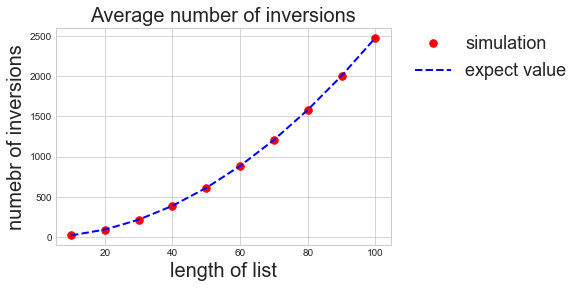

In [66]:
plt.plot(mlist, totalCountlist, '.r', markersize = 15, label = 'simulation')
plt.plot(mlist, mlist*(mlist-1)/4, '--b', linewidth = 2, label = 'expect value')
plt.title('Average number of inversions', fontsize=20)
plt.xlabel('length of list', fontsize=20)
plt.ylabel('numebr of inversions', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left', borderaxespad=0., prop={'size': 18})

In [30]:
### jupyter nbconvert --to markdown Assignment1_04.ipynb

In [31]:
totalCountlist1 = []
for m in mlist:
    totalCount = 0
    for i in range(1000):
        arr = np.random.permutation(m)
        count = bruteForceCount(arr)
        totalCount = totalCount + count
        aveCount = totalCount/1000
    totalCountlist1.append(aveCount)

In [32]:
print(totalCountlist1)

[22.303, 94.916, 215.62, 388.408, 609.389, 885.119, 1208.132, 1581.921, 2005.441, 2486.323]
